## Exercise 3.2a

### Implicit Midpoint Method

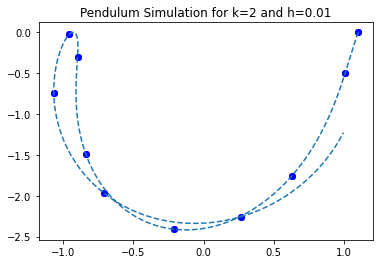

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Set the initial conditions and step size
y0 = [1.1, 0, 0, 0]
h = 0.01
k = 2

# Define the function f(y1, y2) which represents lambda(y1, y2)
def f(y1, y2):
    return k * (np.sqrt(y1**2 + y2**2) - 1) / np.sqrt(y1**2 + y2**2)

# Define the derivative functions
def y1_prime(y1, y2, y3, y4):
    return y3

def y2_prime(y1, y2, y3, y4):
    return y4

def y3_prime(y1, y2, y3, y4):
    return -y1 * f(y1, y2)

def y4_prime(y1, y2, y3, y4):
    return -y2 * f(y1, y2) - 1

# Define the implicit midpoint method
def implicit_midpoint(y0, h):
    y1, y2, y3, y4 = y0
    x_coords = []
    y_coords = []
    
    for i in range(1000):
        k1 = h * y1_prime(y1, y2, y3, y4)
        l1 = h * y2_prime(y1, y2, y3, y4)
        m1 = h * y3_prime(y1, y2, y3, y4)
        n1 = h * y4_prime(y1, y2, y3, y4)
        k2 = h * y1_prime(y1 + k1 / 2, y2 + l1 / 2, y3 + m1 / 2, y4 + n1 / 2)
        l2 = h * y2_prime(y1 + k1 / 2, y2 + l1 / 2, y3 + m1 / 2, y4 + n1 / 2)
        m2 = h * y3_prime(y1 + k1 / 2, y2 + l1 / 2, y3 + m1 / 2, y4 + n1 / 2)
        n2 = h * y4_prime(y1 + k1 / 2, y2 + l1 / 2, y3 + m1 / 2, y4 + n1 / 2)
        y1 += k2
        y2 += l2
        y3 += m2
        y4 += n2
        if i % 100 == 0:
            plt.plot([y1, y1], [y2, y2], 'bo')
    
        x_coords.append(y1)
        y_coords.append(y2)

  # Plot the trajectory of the pendulum
    plt.plot(x_coords, y_coords, '--')
    
# Run the implicit midpoint method and plot the results
implicit_midpoint(y0, h)
plt.title('Pendulum Simulation for k=2 and h=0.01')
plt.show()

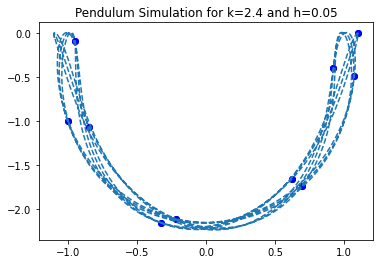

In [2]:
y0 = [1.1, 0, 0, 0]
h = 0.05
k = 2.4
implicit_midpoint(y0, h)
plt.title('Pendulum Simulation for k=2.4 and h=0.05')
plt.show()

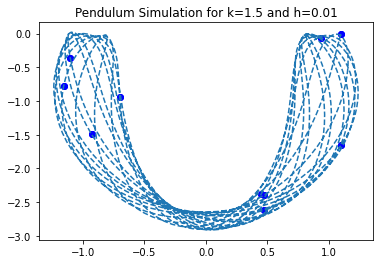

In [3]:
y0 = [1.1, 0, 0, 0]
h = 0.1
k = 1.5
implicit_midpoint(y0, h)
plt.title('Pendulum Simulation for k=1.5 and h=0.01')
plt.show()

### Gauss Method

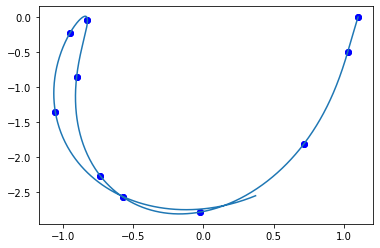

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Set the initial conditions and step size
y0 = [1.1, 0, 0, 0]
h = 0.01

# Define the function f(y1, y2) which represents lambda(y1, y2)
def f(y1, y2):
    return k * (np.sqrt(y1**2 + y2**2) - 1) / np.sqrt(y1**2 + y2**2)

# Define the derivative functions
def y1_prime(y1, y2, y3, y4):
    return y3

def y2_prime(y1, y2, y3, y4):
    return y4

def y3_prime(y1, y2, y3, y4):
    return -y1 * f(y1, y2)

def y4_prime(y1, y2, y3, y4):
    return -y2 * f(y1, y2) - 1

# Define the two-stage Gauss method
def two_stage_gauss(y0, h):
    y1, y2, y3, y4 = y0

 # Initialize lists to store the x and y coordinates of each point on the trajectory
    x_coords = []
    y_coords = []

    for i in range(1000):
        k1 = h * y1_prime(y1, y2, y3, y4)
        l1 = h * y2_prime(y1, y2, y3, y4)
        m1 = h * y3_prime(y1, y2, y3, y4)
        n1 = h * y4_prime(y1, y2, y3, y4)
        k2 = h * y1_prime(y1 + 1/4 * k1 + 1/4 * l1 - sqrt(3)/4 * m1, y2 + 1/4 * k1 + 1/4 * l1, y3 + 1/4 * m1 + sqrt(3)/6 * n1, y4 + 1/4 * m1 + sqrt(3)/6 * n1)
        l2 = h * y2_prime(y1 + 1/4 * k1 + 1/4 * l1 - sqrt(3)/4 * m1, y2 + 1/4 * k1 + 1/4 * l1, y3 + 1/4 * m1 + sqrt(3)/6 * n1, y4 + 1/4 * m1 + sqrt(3)/6 * n1)
        m2 = h * y3_prime(y1 + 1/4 * k1 + 1/4 * l1 - sqrt(3)/4 * m1, y2 + 1/4 * k1 + 1/4 * l1, y3 + 1/4 * m1 + sqrt(3)/6 * n1, y4 + 1/4 * m1 + sqrt(3)/6 * n1)
        n2 = h * y4_prime(y1 + 1/4 * k1 + 1/4 * l1 - sqrt(3)/4 * m1, y2 + 1/4 * k1 + 1/4 * l1, y3 + 1/4 * m1 + sqrt(3)/6 * n1, y4 + 1/4 * m1 + sqrt(3)/6 * n1)

    # Update the coordinates of the current point on the trajectory
        y1 += k2
        y2 += l2
        y3 += m2
        y4 += n2
        
        if i % 100 == 0:
            plt.plot([y1, y1], [y2, y2], 'bo')
            
    # Add the current coordinates to the lists
        x_coords.append(y1)
        y_coords.append(y2)
    plt.plot(x_coords, y_coords)

# Plot the trajectory using the coordinates from the lists
two_stage_gauss(y0, h)
plt.show()

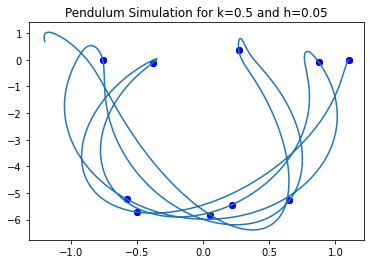

In [11]:
y0 = [1.1, 0, 0, 0]
h = 0.05
k = 0.5
two_stage_gauss(y0, h)
plt.title('Pendulum Simulation for k=0.5 and h=0.05')
plt.show()
